In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from matplotlib.colors import ListedColormap

data = pd.read_csv('breast_cancer_data.csv')

from subprocess import check_output
print(check_output(["ls", "."]).decode("utf8"))

breast_cancer_data.csv
Breast_Cancer.ipynb



In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.isnull().sum()
data.drop('Unnamed: 32', axis = 1, inplace = True )

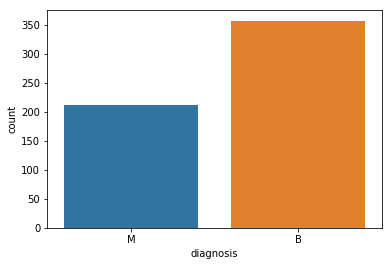

In [5]:
plt.clf()

sns.countplot(x = 'diagnosis', data = data)


x = data.iloc[:, 3:]

y = data.diagnosis
y = y.map({'M':1,'B':0})

plt.show()

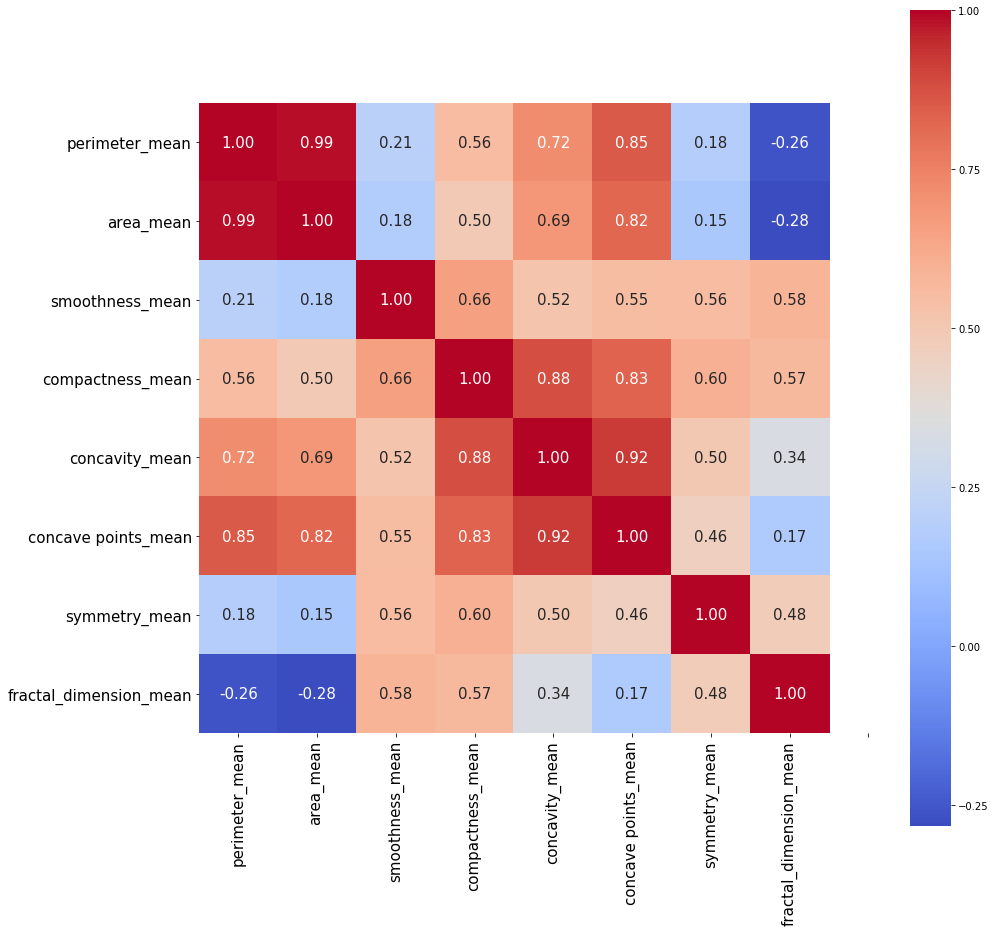

In [8]:
plt.clf()

x.columns
features_mean = x.columns[1:9]
features_se = x.columns[9:19]
features_worst = x.columns[19:]

#Correlation between sets of features
corr = x[features_mean].corr()
g = sns.heatmap(corr, cbar = True, annot=True, annot_kws={'size': 15}, fmt= '.2f', square = True, cmap = 'coolwarm' )
g.set_xticklabels(rotation=90, labels = features_mean, size = 15)
g.set_yticklabels(rotation=0, labels = features_mean, size = 15)
g.set_xticks(np.arange(.5,9.5,1))
plt.rcParams["figure.figsize"] = (15,15)

plt.show()

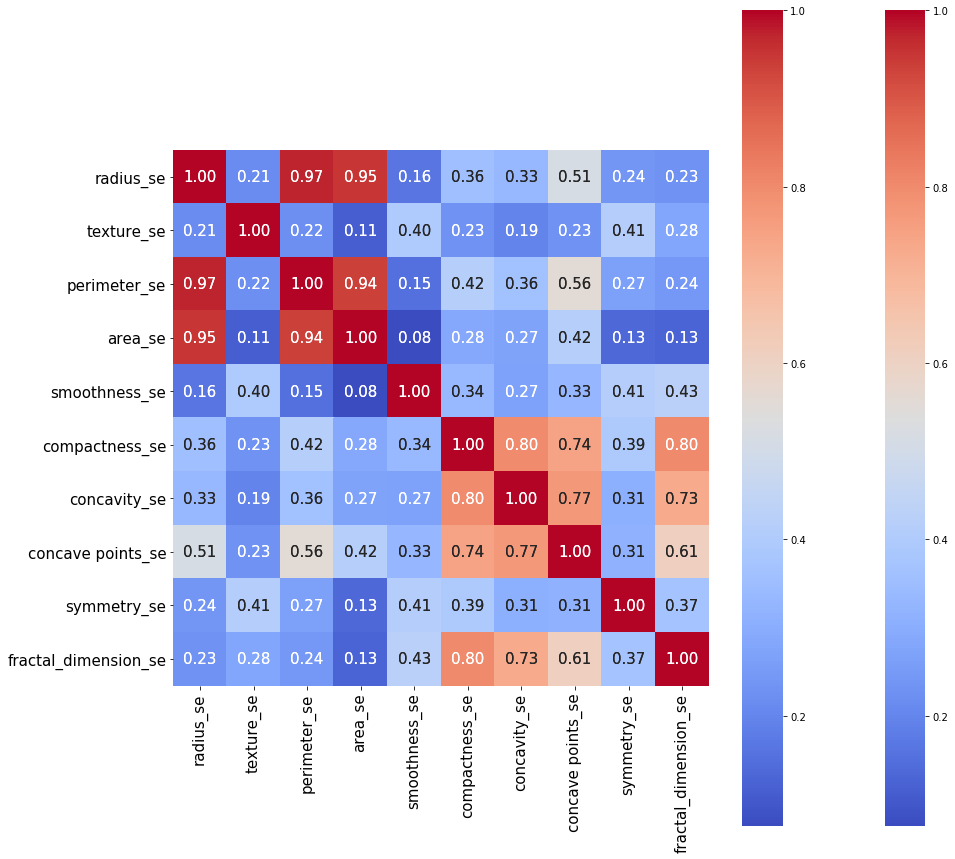

In [10]:
corr = x[features_se].corr()
g = sns.heatmap(corr, cbar = True, annot=True, annot_kws={'size': 15}, fmt= '.2f', square = True, cmap = 'coolwarm' )
g.set_xticklabels(rotation=90, labels = features_se, size = 15)
g.set_yticklabels(rotation=0, labels = features_se, size = 15)
g.set_xticks(np.arange(.5,10.5,1))
plt.rcParams["figure.figsize"] = (15,15)

plt.show()

In [11]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.1)

In [12]:
def BoundaryLine(kernel, algo, algo_name):
    # only two components
    reduction = KernelPCA(n_components=2, kernel = kernel)
    x_train_reduced = reduction.fit_transform(x_train)
    x_test_reduced = reduction.transform(x_test)
    
    classifier = algo
    classifier.fit(x_train_reduced, y_train)
    
    y_pred = classifier.predict(x_test_reduced)
    

    #Boundary Line
    X_set, y_set = np.concatenate([x_train_reduced, x_test_reduced], axis = 0), np.concatenate([y_train, y_test], axis = 0)
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.5, cmap = ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green'))(i), label = j)
    plt.title('{} Boundary Line with {} PCA' .format(algo_name, kernel))
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.legend()
    plt.xticks(fontsize = 3)
    plt.yticks(fontsize = 3)
    #plt.show()

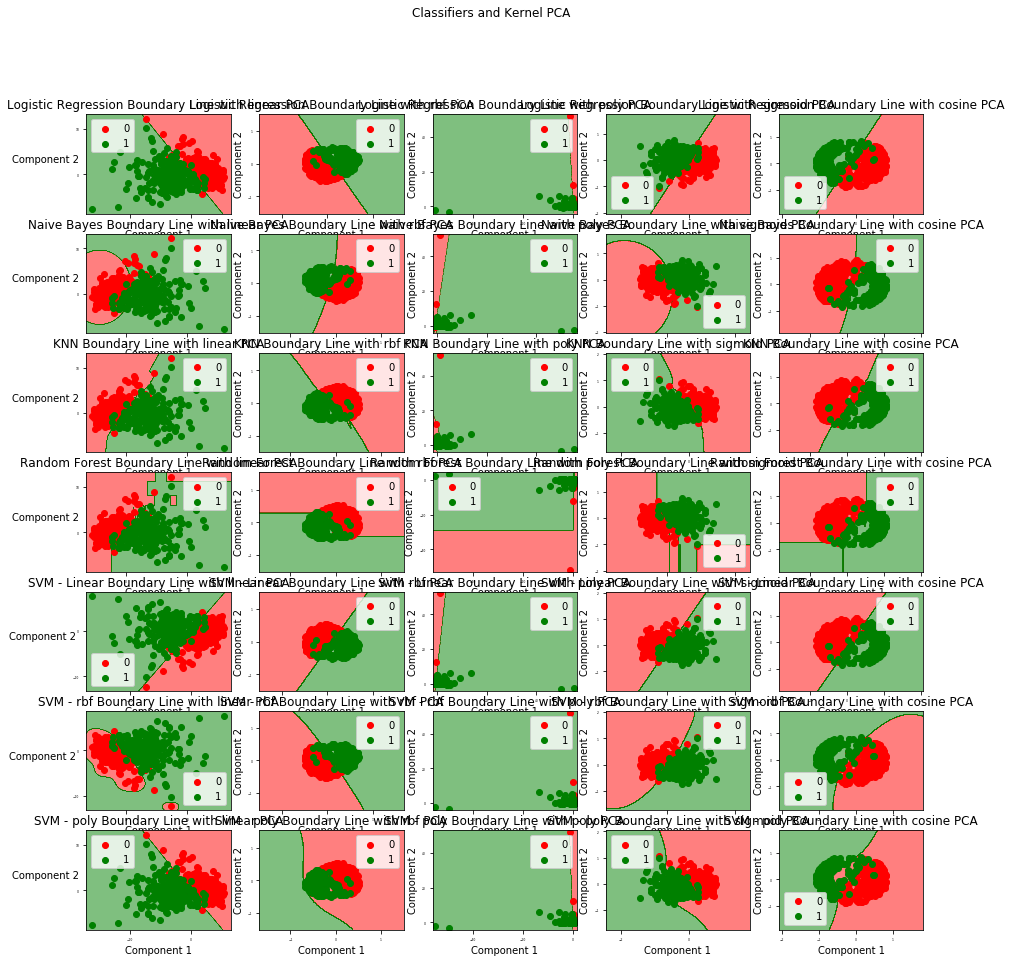

In [15]:
fig = plt.figure()
plt.clf()
fig.clf()

fig.suptitle('Classifiers and Kernel PCA')
#Logistic Regression   
from sklearn.linear_model import LogisticRegression
ax = plt.subplot(7,5,1)
ax.set_title('Linear PCA')
ax.set_ylabel('Logistic \n Regression', rotation = 0, labelpad=30, fontsize = 10)
BoundaryLine('linear', LogisticRegression(), "Logistic Regression")

ax = plt.subplot(7,5,2)
ax.set_title('RBF PCA')
BoundaryLine('rbf', LogisticRegression(), "Logistic Regression")

ax = plt.subplot(7,5,3)
ax.set_title('Poly PCA')
BoundaryLine('poly', LogisticRegression(), "Logistic Regression")

ax = plt.subplot(7,5,4)
ax.set_title('Sigmoid PCA')
BoundaryLine('sigmoid', LogisticRegression(), "Logistic Regression")

ax = plt.subplot(7,5,5)
ax.set_title('Cosine PCA')
BoundaryLine('cosine', LogisticRegression(), "Logistic Regression")

#Naive Bayes
from sklearn.naive_bayes import GaussianNB
ax = plt.subplot(7,5,6)
ax.set_ylabel('Naive \n Bayes', rotation = 0, labelpad=30, fontsize = 10)
BoundaryLine('linear', GaussianNB(), "Naive Bayes")
ax = plt.subplot(7,5,7)
BoundaryLine('rbf', GaussianNB(), "Naive Bayes")
ax = plt.subplot(7,5,8)
BoundaryLine('poly', GaussianNB(), "Naive Bayes")
ax = plt.subplot(7,5,9)
BoundaryLine('sigmoid', GaussianNB(), "Naive Bayes")
ax = plt.subplot(7,5,10)
BoundaryLine('cosine', GaussianNB(), "Naive Bayes")

#K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
ax = plt.subplot(7,5,11)
ax.set_ylabel('KNN', rotation = 0, labelpad=30, fontsize = 10)
BoundaryLine('linear', KNeighborsClassifier(), "KNN")
ax = plt.subplot(7,5,12)
BoundaryLine('rbf', KNeighborsClassifier(), "KNN")
ax = plt.subplot(7,5,13)
BoundaryLine('poly', KNeighborsClassifier(), "KNN")
ax = plt.subplot(7,5,14)
BoundaryLine('sigmoid', KNeighborsClassifier(), "KNN")
ax = plt.subplot(7,5,15)
BoundaryLine('cosine', KNeighborsClassifier(), "KNN")

#Random Forest
from sklearn.ensemble import RandomForestClassifier
ax = plt.subplot(7,5,16)
ax.set_ylabel('Random \n Forest', rotation = 0, labelpad=30, fontsize = 10)
BoundaryLine('linear', RandomForestClassifier(), "Random Forest")
ax = plt.subplot(7,5,17)
BoundaryLine('rbf', RandomForestClassifier(), "Random Forest")
ax = plt.subplot(7,5,18)
BoundaryLine('poly', RandomForestClassifier(), "Random Forest")
ax = plt.subplot(7,5,19)
BoundaryLine('sigmoid', RandomForestClassifier(), "Random Forest")
ax = plt.subplot(7,5,20)
BoundaryLine('cosine', RandomForestClassifier(), "Random Forest")

#Support Vector - linear
from sklearn.svm import SVC
ax = plt.subplot(7,5,21)
ax.set_ylabel('SVM \n Linear', rotation = 0, labelpad=30, fontsize = 10)
BoundaryLine('linear', SVC(kernel = 'linear'), "SVM - Linear")
ax = plt.subplot(7,5,22)
BoundaryLine('rbf', SVC(kernel = 'linear'), "SVM - Linear")
ax = plt.subplot(7,5,23)
BoundaryLine('poly', SVC(kernel = 'linear'), "SVM - Linear")
ax = plt.subplot(7,5,24)
BoundaryLine('sigmoid', SVC(kernel = 'linear'), "SVM - Linear")
ax = plt.subplot(7,5,25)
BoundaryLine('cosine', SVC(kernel = 'linear'), "SVM - Linear")

#Support Vector - RBF
ax = plt.subplot(7,5,26)
ax.set_ylabel('SVM \n rbf', rotation = 0, labelpad=30, fontsize = 10)
BoundaryLine('linear', SVC(kernel = 'rbf'), "SVM - rbf")
ax = plt.subplot(7,5,27)
BoundaryLine('rbf', SVC(kernel = 'rbf'), "SVM - rbf")
ax = plt.subplot(7,5,28)
BoundaryLine('poly', SVC(kernel = 'rbf'), "SVM - rbf")
ax = plt.subplot(7,5,29)
BoundaryLine('sigmoid', SVC(kernel = 'rbf'), "SVM - rbf")
ax = plt.subplot(7,5,30)
BoundaryLine('cosine', SVC(kernel = 'rbf'), "SVM - rbf")


#Support Vector - Poly
ax = plt.subplot(7,5,31)
ax.set_ylabel('SVM \n poly', rotation = 0, labelpad=30, fontsize = 10)
BoundaryLine('linear', SVC(kernel = 'poly'), "SVM - poly")
ax = plt.subplot(7,5,32)
BoundaryLine('rbf', SVC(kernel = 'poly'), "SVM - poly")
ax = plt.subplot(7,5,33)
BoundaryLine('poly', SVC(kernel = 'poly'), "SVM - poly")
ax = plt.subplot(7,5,34)
BoundaryLine('sigmoid', SVC(kernel = 'poly'), "SVM - poly")
ax = plt.subplot(7,5,35)
BoundaryLine('cosine', SVC(kernel = 'poly'), "SVM - poly")

plt.show()